## EE 461P: Data Science Principles  
### Homework 2  
### Total points: 95
### Due: Feb 16, 2023, submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):

1. Laith Altarabishi - la26744
1. Sidharth Babu, SNB2593

2 (if applicable).

# Q1. Bias-Variance Trade-off (20 points)

## 1.1 Bias-Variance Decomposition (10 points)
Consider a real-valued function $h(x)$. You were trying to estimate this function using a regression model on the dataset $D$ consisting of $(X, Y)$ pairs. Let the output of the training procedure be another function given by $y(x;D)$. This new function $y(x;D)$ depends on $D$ since it was obtained by regressing on $D$.

To evaluate how well $y(x;D)$ generalizes we are interested in computing the expected error $E_D [(y(x; D) - h(x))^2]$, where the expectation is over all datasets of the same size as $D$, each obtained by i.i.d. sampling from the underlying joint distribution of X and Y. Show that this expected error decomposes into a bias term plus a variance term that you have seen in lecture slides named '2A dsp regression1.pdf'.

Hint: 
Write
$$
  (y(x; D) - h(x))^2 = ( y(x; D) - E_D [y(x; D)] + E_D [y(x; D)] - h(x))^2 = 
$$
$$
  (y(x; D) - E_D [y(x; D)])^2 + (E_D [y(x; D)] - h(x))^2 - 2 (y(x; D) - E_D [y(x; D)]) (E_D [y(x; D)] - h(x))
$$

And take expectation over $D$ on both sides

Let y(x|D) = y and h(x) = h 

$$

\begin{align*}
    E[(y-h)^2] &= E[(y-E[y])^2] + E[E[y]^2-2E[y]+h^2] -2E[(y-E[y])(E[y]-h)] &\\
    &= Var(y) + E[y]^2 - 2E[y]E[h] + E[h]^2 -2E[(y-E[y])(E[y]-h)] &\\
    &= Var(y) + E[y]^2 - 2E[y]E[h] + E[h]^2 -2E[y]^2 +2E[y][h]+2E[y]^2-2E[h]E[y]&\\
    &= Var(y) + E[y]^2 + E[h]^2 - 2E[y]E[h] &\\
    &= Var(y) + (E[y]- E[h])^2 &\\
\end{align*}


$$

For a given X:
$$
\begin{align*}
    E[(y(x|D)-h(x))^2] = Var(y(x|D)) + (E[y(x|D)]- h(x))^2
\end{align*}
$$

$$
  
$$

## 1.2 Bias-Variance Explanation (5 points)
Briefly explain the bias and variance formulas that were derived above and describe how they relate to underfitting/overfitting.

## Answer:
The formula shows that total error is the sum of squared bias and variance. Intuitively, bias is a measure of how far the mean answer is from the underlying distribution, and measures the "goodness" of the model. The variance indicates how sensitive the model is to new / unexpected data, and indicates how general the model is. A high bias indicates that a model is very underfit and not complex enough to capture the actual distribution. High variance indicates that the model is overfit, and is overly complex and not able to generalize to unseen data.

## 1.3 Underfitting vs Overfitting (5 points)
Suppose you have randomly divided the given dataset $D$ into a training dataset and a test dataset. Now you keep on gradually reducing the size of train dataset by moving some points to the test set. As the train set size decreases, what do you
expect will happen to the train and test errors? In your answers, consider both the expected values of these two quantities as well the spread (variance) in the values obtained. Justify briefly.

## Answer:

Assuming that the model remains constant, the training error will decrease and the test error will increase. This is because the model has to fit to less data, representing the underlying distribution more sparsely. This will lead to a higher bias and lower variance in the model, and it will perform worse on the test set.

# Q2. Log-likelihood (10 points)

Consider a linear regression model $y = w.x + ϵ$. Here $x$ is a scalar. The noise  $ϵ$ is IID but depends on $x$ in a way described below:
$$
ϵ_i ∼ N(0, σ^2) \quad \text{if } x_i > 0 
$$
and   
$$
ϵ_i ∼ N(0, 4σ^2) \quad \text{if } x_i \leq 0 
$$
Given $n$ observations ${y_1,y_2, \dots y_n}$, derive the negative log-likelihood term for this assumed generative model. 

## Answer:

Deriving Log Likelihood:
$$
\begin{align*}
    \mathcal{L}(Y_n) &= \prod_{i:x_i>0} N(y_i \vert wx_0, \sigma^2) \prod_{i:x_i<=0} N(y_i \vert wx_0, 4\sigma^2) \\
    l(Y_n) &= \sum_{i:x_i>0} \log N(y_i \vert wx_0, \sigma^2) + \sum_{i:x_i<=0} \log N(y_i \vert wx_0, 4\sigma^2) \\
    &= \sum_{i:x_i>0} \log \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(y_i-wx_0)^2}{2\sigma^2}} + \sum_{i:x_i<=0} \log \frac{1}{\sqrt{2\pi4\sigma^2}}e^{-\frac{(y_i-wx_0)^2}{2(4\sigma^2)}} \\
    &= \sum_{i:x_i>0} \log (1) - \log(\sqrt{2\pi\sigma^2})+ \log (e^{-\frac{(y_i-wx_0)^2}{2\sigma^2}}) + \sum_{i:x_i<=0} \log (1) - \log(\sqrt{8\pi\sigma^2})+ \log (e^{-\frac{(y_i-wx_0)^2}{8\sigma^2}}) \\
    &= \sum_{i:x_i>0} -\frac{1}{2}\log(2\pi\sigma^2) - \frac{(y_i-wx_0)^2}{2\sigma^2} + \sum_{i:x_i<=0} -\frac{1}{2}\log(8\pi\sigma^2) - \frac{(y_i-wx_0)^2}{8\sigma^2} \\
    &= -\frac{n}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i:x_i>0}(y_i-wx_0)^2 - \frac{n}{2}\log(8\pi\sigma^2) - \frac{1}{8\sigma^2}\sum_{i:x_i<=0}(y_i-wx_0)^2 \\
    &= -\frac{n}{2}(\log(2\pi\sigma^2)+\log(8\pi\sigma^2)) - \frac{1}{2\sigma^2}\sum_{i:x_i>0}(y_i-wx_0)^2 - \frac{1}{8\sigma^2}\sum_{i:x_i<=0}(y_i-wx_0)^2 \\
    &= -\frac{n}{2}(\log(2\pi\sigma^2*8\pi\sigma^2)) - \frac{1}{2\sigma^2}\sum_{i:x_i>0}(y_i-wx_0)^2 - \frac{1}{8\sigma^2}\sum_{i:x_i<=0}(y_i-wx_0)^2 \\
    &= -\frac{n}{2}\log(16\pi\sigma^4) - \frac{1}{2\sigma^2}\sum_{i:x_i>0}(y_i-wx_0)^2 - \frac{1}{8\sigma^2}\sum_{i:x_i<=0}(y_i-wx_0)^2 \\
\end{align*}
$$

Therefore, the NLL is:
$$
NLL(Y_n) = \frac{n}{2}\log(16\pi\sigma^4) + \frac{1}{2\sigma^2}\sum_{i:x_i>0}(y_i-wx_0)^2 + \frac{1}{8\sigma^2}\sum_{i:x_i<=0}(y_i-wx_0)^2
$$

# Q3. Model Complexity and Bias/Variance Trade-off (35 points)

3.1 Load the data given in `all_data_q5.npy` using `numpy.load()` function. This dataset contains the train and test datasets in `(x_train, y_train)` and `(x_test, y_test)` respectively. 

Now, fit the polynomial models of degrees 1, 5, and 10 on the training data, and print out the mean squared error for train and test datasets for all the models. Essentially, we are trying to fit linear models of this form: $\hat f(x) = \beta_0 + \beta_1x + \beta_1 x^2 + ... + \beta_px^p$, where $p$ is the degree of the polynomial. (10 points)

Visualise the trained models by making predictions on evenly spaced numbers on x-axis in a fixed range, for eg. you can generate x's by calling `x_all = np.linspace(0, 1, 75).reshape(-1,1)` and call predict on x_all.

In the same figure, add the following plots:

i) Train data plot : y_train vs x_train

ii) Test data plot : y_test vs x_test

All the plots must clearly labeled. (10 points)



**Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train` and you can call `np.vander` inside the fit method of linear regression. 


Make use of the starter code we have provided, and fill the `plot_curves` function.

In [1]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_load = np.load('./all_data_q5.npy', allow_pickle=True)
x_train = data_load.item().get("x_train")
y_train = data_load.item().get("y_train")
x_test = data_load.item().get("x_test")
y_test = data_load.item().get("y_test")

lrp = LinearRegression()

In [2]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 1, 5, 10 to the training data. 
  deg = [1, 5, 10]

  trainMSES = []
  testMSES = []
  for d in deg:
    new_train = np.vander(x_train, d+1)
    model = lrp.fit(new_train, y_train)
    #generate RMSE for train and test
    train_pred = model.predict(new_train)
    test_pred = model.predict(np.vander(x_test, d+1))
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    trainMSES.append(train_mse)
    testMSES.append(test_mse)
    print("RMSE for train and test for degree ", d, " is", train_mse, test_mse)
    # i) Train data plot : y_train vs x_train
    plt.scatter(x_train, y_train, color = 'blue')
    # ii) Test data plot : y_test vs x_test
    plt.scatter(x_test, y_test, color = 'red')
    # iii) Fitted model plot : predictions on x_all by different models vs x_all
    x_all = np.linspace(0, 1, 75)
    plt.scatter(x_all, model.predict(np.vander(x_all, d+1)), color = 'green')
    plt.legend(['Train', 'Test', 'Fitted model'])
    plt.show()
    plt.figure()

  return trainMSES, testMSES

Fit the different polynomials to the training data and make the plots:

RMSE for train and test for degree  1  is 0.3209424340594463 0.3761180477921123


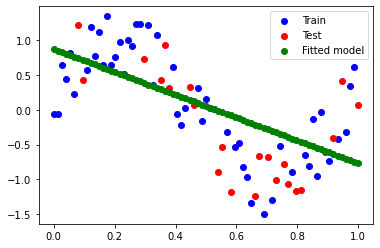

RMSE for train and test for degree  5  is 0.09698205116425807 0.09740841628524097


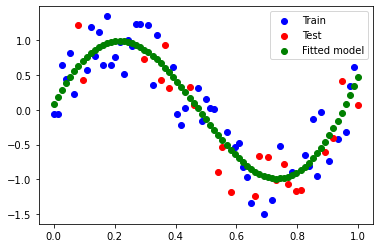

RMSE for train and test for degree  10  is 0.0798829688182546 0.2646110853318261


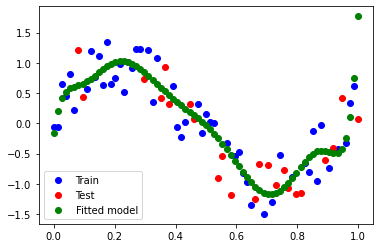

<Figure size 432x288 with 0 Axes>

In [22]:
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

3.2 Which model gives the best performance (measured by MSE)? Explain in terms of the bias-variance tradeoff. (5 points)


The model with degree 5 has the best performance, as it has a lower test MSE than the other models. It's MSE performance is also similar between its training and test set, which is a strong indicator that our model is not overfitting or underfitting to the data - whereas the degree 10 model is clearly overfitting to the data as the model has become too complex. Too much complexity will mean that our average model (high bias) is very good, but at the cost of being more sensitive to variation in the data - hence the high MSE test set score relative to the lower MSE train set score.

3.3 Analyse how the training data size affects bias and variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. For each of the three models, plot $log(MSE)$ on train dataset vs the size of the training data and again $log(MSE)$ on test dataset vs the size of the training data. State the trends you see as you change the size of the training data on each of the models and explain why you see them. All plots must be in a single figure and labelled correctly. (10 points)

Study the effects of the training data size on the bias and variance

20% data
RMSE for train and test for degree  1  is 0.19288761970291343 0.401840814325381


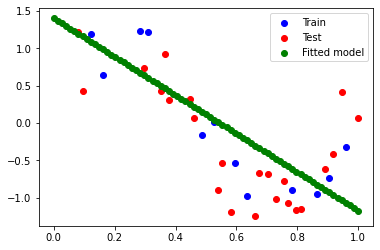

RMSE for train and test for degree  5  is 0.03756861694417264 0.15978126164250753


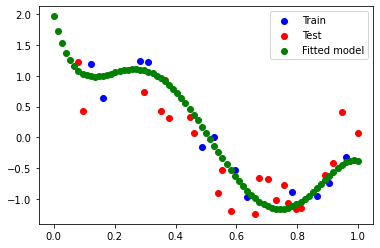

RMSE for train and test for degree  10  is 0.0006169190619963737 8.620907381537092


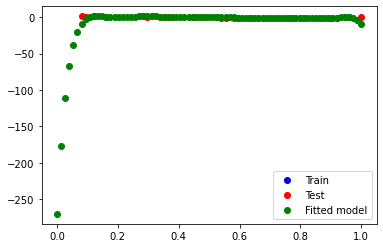

40% data
RMSE for train and test for degree  1  is 0.24756160243053882 0.3962506207927371


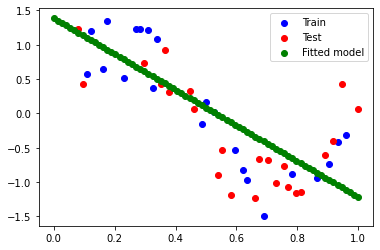

RMSE for train and test for degree  5  is 0.07232186959189733 0.13289823179048346


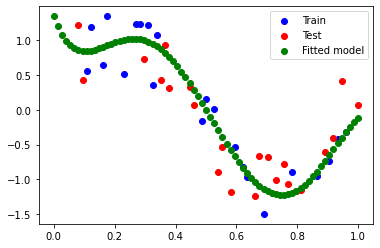

RMSE for train and test for degree  10  is 0.047779123606757956 2.9395151808178643


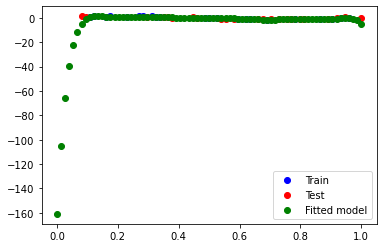

60% data
RMSE for train and test for degree  1  is 0.35764058868540716 0.37584069301124207


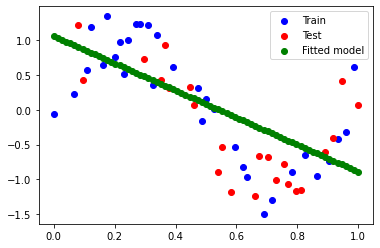

RMSE for train and test for degree  5  is 0.06828554275546084 0.13254249243161675


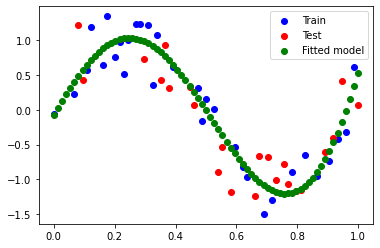

RMSE for train and test for degree  10  is 0.05326719829908214 0.2621002065841166


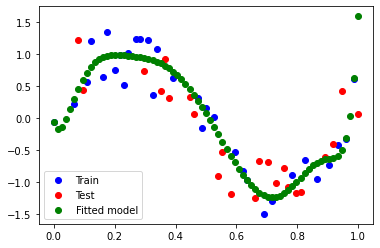

80% data
RMSE for train and test for degree  1  is 0.3381982325860509 0.38483285889346164


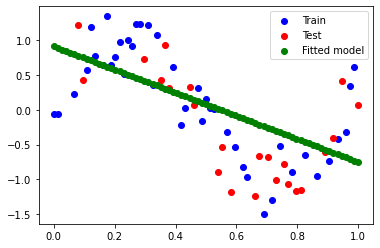

RMSE for train and test for degree  5  is 0.07840575299334238 0.11623841751489698


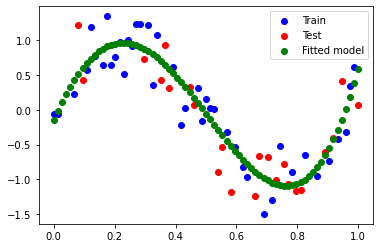

RMSE for train and test for degree  10  is 0.06952434856927696 0.22760925680695857


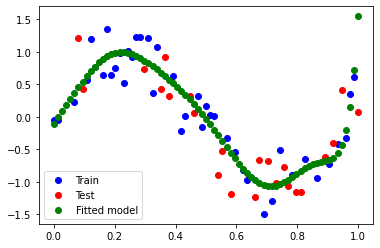

100% data
RMSE for train and test for degree  1  is 0.3209424340594463 0.3761180477921123


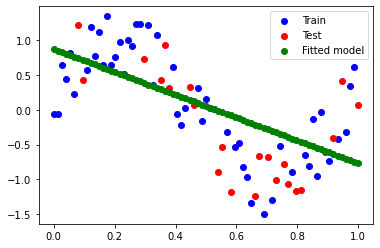

RMSE for train and test for degree  5  is 0.09698205116425807 0.09740841628524097


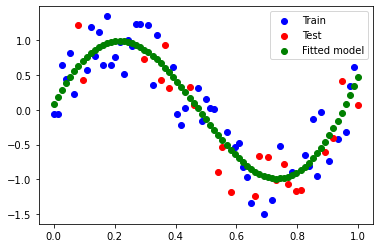

RMSE for train and test for degree  10  is 0.0798829688182546 0.2646110853318261


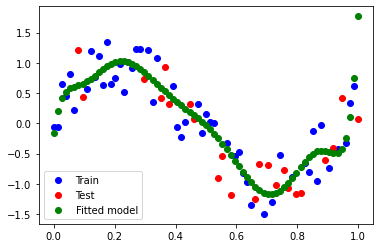

<Figure size 432x288 with 0 Axes>

In [23]:
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

## Answer:

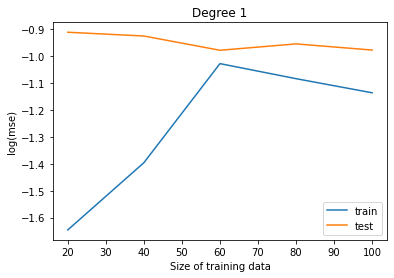

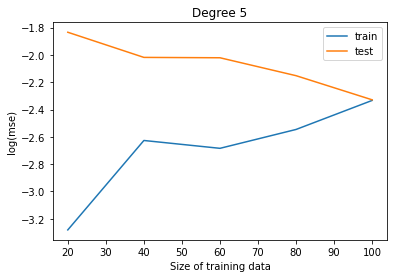

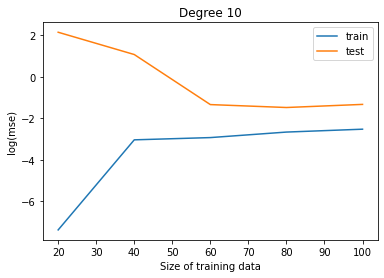

<Figure size 432x288 with 0 Axes>

In [28]:
# plot the log(mse) on train and test dataset vs size of training data for different degrees
#combine all the train_mse
train_mses = np.stack((train_rmses_20, train_rmses_40, train_rmses_60, train_rmses_80, train_rmses_100), axis=0)
test_mses = np.stack((test_rmses_20, test_rmses_40, test_rmses_60, test_rmses_80, test_rmses_100), axis=0)
#plot the log(mse) on train and test dataset vs size of training data for different degrees
plt.figure()
degrees = [1, 5, 10]
for i in range(3):
    #plot logmse vs size of training data
    plt.plot([20, 40, 60, 80, 100], np.log(train_mses[:, i]), label='train')
    plt.plot([20, 40, 60, 80, 100], np.log(test_mses[:, i]), label='test')
    plt.legend()
    plt.xlabel('Size of training data')
    plt.ylabel('log(mse)')
    plt.title('Degree '+ str(degrees[i]))
    plt.show()
    plt.figure()

For our complexity of 1, we see that increasing the size of the training and test data doesn't significantly reduce the amount of test MSE error. This makes since we know that less complex models will typically have strong bias as their main source of error, which is not going to change significantly as we increase our training size. This is in contrast to our two other models which are significantly more complex, where we notice that our test error decreases significantly more in both cases since they are both more susceptible to error in variance. As our degree of complexity goes from 5 to 10, we see that our test error actually decreases even more significantly in the degree 10 case - which again is a result of the high sensitivity of more complex models to changes in the data. Thus, we see that being able to increase the size of training/testing data allows us to reduce testing error more significantly in models that are more complex in nature.

# Q4. Stochastic Gradient Descent (20 points)

4.1 In class you studied about SGD wherein instead of computing the "full" gradient over all data points $\nabla f(w) = \dfrac{1}{N} ∑_{i=1}^{N} \nabla f_i(w)$, you just estimate the gradient based on one randomly selected data point $\nabla f_i(w)$ at a time, and use it to move forward in optimization. Show that this "stochastic gradient" is an unbiased estimator of the full gradient. (10 points)

4.2 Suppose you are using SGD optimization to solve a linear regression problem $y = w^Tx$ to obtain the $w$ that minimizes the mean squared error $E(w) = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - w^Tx_i)^2$ . Given that you initialise $w$ as $w_0$, write the one step update equation for $w$. Here $x$ is a vector with $M+1$ components. (10 points)

## Answer:
4.1) The expectation of the gradient is the same as the gradient of the expectation. Therefore, 

$E[\nabla f(w)] = \nabla E[f(w)] = \nabla \frac{1}{N} \sum_{i}^{N}f_i(w) = \frac{1}{N} \sum_{i}^{N} \nabla f_i(w)$


4.2) The one-step update equation for w is:

$$
\begin{align*}
    w_1 &= w_0 - \eta(\nabla E \rvert_{w_0}) \\
    &= w_0 - \eta(\frac{\partial{E}}{\partial{w}}(\frac{1}{N}\sum_{i}^{N}(y_i-w_0^Tx_i)^2)) \\
\text{Since it is SGD, N is 1:}\\
    &= w_0 - \eta(\frac{\partial{E}}{\partial{w}}((y_i-w_0^Tx_i)^2)) \\
    &= w_0 - \eta(-2x_i(y_i-w_0^Tx_i)) \\
    &= w_0 + \eta(2x_i(y_i-w_0^Tx_i)) \\
\end{align*}
$$